# Can you cross the river?

You’re on the north shore of a river, and want to cross to the south, via a series of 13 bridges and six islands, which you can see in the diagram below.

![Bridges](https://espnfivethirtyeight.files.wordpress.com/2016/01/roeder-riddler-diagram-11.png?w=575&h=449&quality=90&strip=info)

But, as you approach the water, night falls, a bad storm rolls in, and you’re forced to wait until morning to try to cross. Overnight, the storm could render some of the bridges unusable — it has a 50 percent chance of knocking out each of the bridges. (The chance is independent for each bridge.)

What’s the probability you will be able to cross the river in the morning? (You have no boat, can’t swim, can’t fix the bridges, etc. No tricks.)

** In this section I will use graph data structure to describe the links and remove the bridges/edges at random and to the shortest path between the two end shores/nodes **

In [144]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

ModuleNotFoundError: No module named 'NetworkXNoPath'

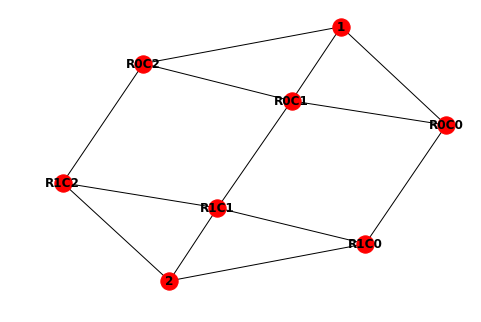

In [106]:
rows = 2
cols = 3

G = nx.Graph()
G.add_node(1)
G.add_node(2)
for r in range(rows):
    # Connect to upper layer
    for c in range(cols):
        if r == 0:
            G.add_edge(1, 'R{}C{}'.format(r, c))
        else:
            G.add_edge('R{}C{}'.format(r-1, c), 'R{}C{}'.format(r, c))
    # Connect all nodes in current row
    for c in range(cols - 1):
        a = 'R{}C{}'.format(r, c)
        b = 'R{}C{}'.format(r, c+1)
        G.add_edge(a, b)
# Connect bottom layer to south shore
for c in range(cols):
    G.add_edge('R{}C{}'.format(rows-1, c), 2)

nx.draw(G, with_labels=True, font_weight='bold')

## Simulation

Destroy random edge based on percentage defined

In [239]:
iterations = 1000
damage_pct = 0.5
path_result = []
for itr in range(iterations):
    G_sim = G.copy()
    random_ary = np.random.random((1, len(G_sim.edges)))[0]
    removal_list = []
    for i, e in enumerate(list(G_sim.edges())):
        if random_ary[i] <= damage_pct:
            removal_list.append(e)
    G_sim.remove_edges_from(removal_list)
    try:
        short_path = nx.shortest_path(G_sim, 1, 2)
        has_path = True
    except nx.NetworkXNoPath:
        has_path = False
    path_result.append(has_path)
crossed = sum(path_result)
total = len(path_result)
rate = crossed / total
print('Crossed rate: {:.2f}% crossed: {} total: {}'.format(rate * 100, crossed, total))

Crossed rate: 49.60% crossed: 496 total: 1000
